## Análisis exploratorio de datos (EDA) ##

- En primer lugar voy a importar las librerias que voy a utilizar para realizar el EDA de mi proyecto

In [3]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import locale 
import ast 
import seaborn as sns
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/n3/ppx4r_992xxbdk4s0ht21__m0000gn/T/ipykernel_7081/4175806869.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
df = pd.read_csv ("/Users/romina/Desktop/Datasets/peliculas.csv")

- Analizo como quedo la composición del Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget                 45376 non-null  int64  
 2   genres                 42992 non-null  object 
 3   id                     45376 non-null  int64  
 4   original_language      45365 non-null  object 
 5   overview               44435 non-null  object 
 6   popularity             45376 non-null  float64
 7   production_companies   33580 non-null  object 
 8   production_countries   39165 non-null  object 
 9   release_date           45376 non-null  object 
 10  revenue                45376 non-null  float64
 11  runtime                45130 non-null  float64
 12  spoken_languages       41608 non-null  object 
 13  status                 45296 non-null  object 
 14  tagline                20398 non-null  object 
 15  ti

- Visualizo la composición de las primeras 2 filas del df

In [6]:
df.head(2)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,return,month_name,day_name,release_year
0,Toy Story Collection,30000000,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,...,['English'],Released,NaN,Toy Story,7.7,5415.0,12.0,Octubre,Lunes,1995
1,NaN,65000000,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,...,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,4.0,Diciembre,Viernes,1995


- Visualizo la composición de las últimas 2 filas del df

In [7]:
df.tail(2)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,return,month_name,day_name,release_year
45374,NaN,0,NaN,227506,en,"In a small town live two brothers, one a minis...",0.003503,['Yermoliev'],['Russia'],1917-10-21,...,NaN,Released,NaN,Satan Triumphant,0.0,0.0,0.0,Octubre,Domingo,1917
45375,NaN,0,NaN,461257,en,50 years after decriminalisation of homosexual...,0.163015,NaN,['United Kingdom'],2017-06-09,...,['English'],Released,NaN,Queerama,0.0,0.0,0.0,Junio,Viernes,2017


- Elimino las columnas que no voy a utilizar

In [8]:
df.drop("id",axis="columns",inplace=True)
df.drop("month_name",axis="columns",inplace=True)
df.drop("day_name",axis="columns",inplace=True)
df.drop("budget",axis="columns",inplace=True)
df.drop("production_countries",axis="columns",inplace=True)
df.drop("spoken_languages",axis="columns",inplace=True)
df.drop("overview",axis="columns",inplace=True)
df.drop("tagline",axis="columns",inplace=True)
df.drop("runtime",axis="columns",inplace=True)

- Observo como queda la composicion de mi df

In [9]:
df.head(2)

,belongs_to_collection,genres,original_language,popularity,production_companies,release_date,revenue,status,title,vote_average,vote_count,return,release_year
0,Toy Story Collection,"['Animation', 'Comedy', 'Family']",en,21.946943,['Pixar Animation Studios'],1995-10-30,373554033.0,Released,Toy Story,7.7,5415.0,12.0,1995
1,NaN,"['Adventure', 'Fantasy', 'Family']",en,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",1995-12-15,262797249.0,Released,Jumanji,6.9,2413.0,4.0,1995


- Describo las columnas

In [10]:
df.describe (exclude = 'number')

,belongs_to_collection,genres,original_language,production_companies,release_date,status,title
count,4488,42992,45365,33580,45376,45296,45376
unique,1695,4064,89,22667,17333,6,42196
top,The Bowery Boys,['Drama'],en,['Metro-Goldwyn-Mayer (MGM)'],2008-01-01,Released,Cinderella
freq,29,4998,32202,742,136,44936,11


- Describo las columnas numéricas

In [11]:
df.describe()

,popularity,revenue,vote_average,vote_count,return,release_year
count,45376.000000,4.537600e+04,45376.000000,45376.000000,4.537600e+04,45376.000000
mean,2.926458,1.123010e+07,5.624070,110.096439,6.600407e+02,1991.881193
std,6.009672,6.438996e+07,1.915423,491.742894,7.469329e+04,24.055360
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1874.000000
25%,0.388840,0.000000e+00,5.000000,3.000000,0.000000e+00,1978.000000
50%,1.130454,0.000000e+00,6.000000,10.000000,0.000000e+00,2001.000000
75%,3.691695,0.000000e+00,6.800000,34.000000,0.000000e+00,2010.000000
max,547.488298,2.787965e+09,10.000000,14075.000000,1.239638e+07,2020.000000


- Miro la cantidad de duplicados

In [12]:
column_names = df.columns
n_duplicates = df.drop(labels=column_names, axis=1).duplicated().sum()

n_duplicates

0

### En este instante, voy a realizar los gráficos que creo relevantes para comprender las relaciones que se generan entre los datos... ###

- Creo un gráfico para ver la cantidad de valores nulos 

In [13]:
null_counts = df.isnull().sum()

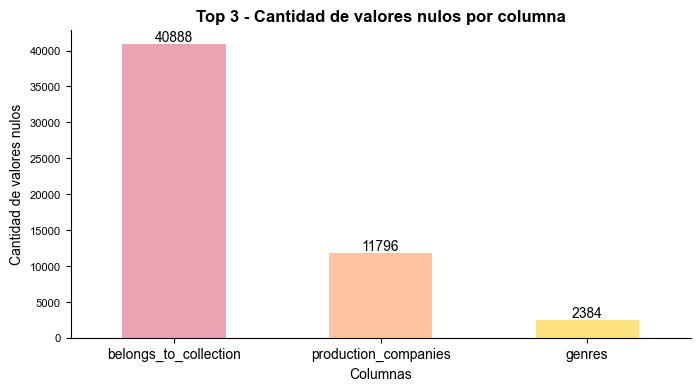

In [14]:
#Obtengo el top 3 de columnas con mayor cantidad de valores nulos
top_null_counts = null_counts.nlargest(3)

plt.figure(figsize=(8, 4))
colors = ["#EBA4B4", "#FFC3A0", "#FFE380"]
top_null_counts.plot(kind='bar', color=colors)
plt.title('Top 3 - Cantidad de valores nulos por columna', fontname='arial', fontsize=12, fontweight='bold')
plt.xlabel('Columnas', fontname='arial', fontsize=10)
plt.ylabel('Cantidad de valores nulos', fontname='arial', fontsize=10)
plt.xticks(rotation=0)
plt.yticks(fontsize=8)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Agregar etiquetas de valores nulos en las barras
for i, count in enumerate(top_null_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', color='black')

plt.show()

- Realizo un gráfico que me permita visualizar un top 5 de géneros de películas más comunes

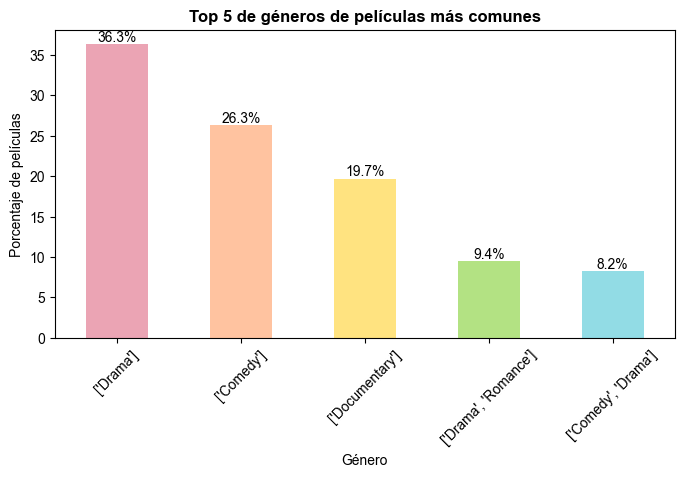

In [15]:
#Calculo el recuento de películas por género
genre_counts = df["genres"].value_counts()

#Obtengo el top 10 de géneros más comunes
top_genres = genre_counts.head(5)

#Calculo el porcentaje de películas por género
genre_percentages = (top_genres / top_genres.sum()) * 100

#Creo el gráfico de barras con colores pastel
plt.figure(figsize=(8, 4))
colors = ["#EBA4B4", "#FFC3A0", "#FFE380", "#B3E283", "#92DCE5", "#B4A9F2", "#E5A8F2", "#FFA8D5", "#FF9E9E", "#C5C5C5"]
genre_percentages.plot(kind="bar", color=colors)

#Agrego etiquetas de porcentaje en las barras
for i, percentage in enumerate(genre_percentages):
    plt.text(i, percentage, f"{percentage:.1f}%", ha="center", va="bottom", color="black")

#Personalizo el gráfico
plt.title("Top 5 de géneros de películas más comunes", fontweight='bold')
plt.xlabel("Género")
plt.ylabel("Porcentaje de películas")
plt.xticks(rotation=45)

#Muestro el gráfico
plt.show()

- Realizo un gráfico que me permita visualizar un top 5 de los idiomas de películas más comunes

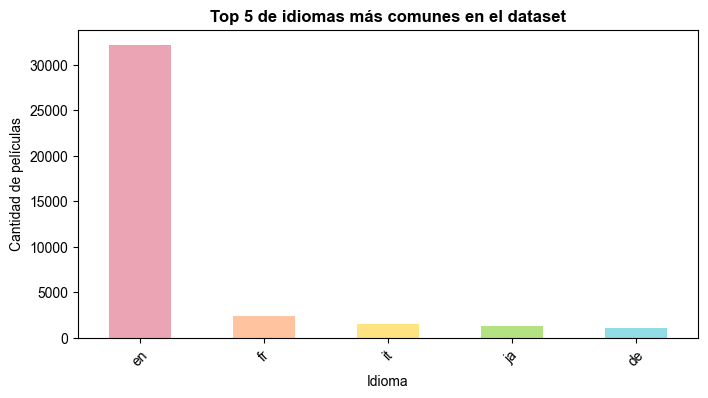

In [16]:
#Calculo el recuento de películas por idioma
language_counts = df["original_language"].value_counts()

#Obtengo el top 5 de idiomas más comunes
top_languages = language_counts.head(5)

#Creo el gráfico de barras con colores pastel
plt.figure(figsize=(8, 4))
colors = ["#EBA4B4", "#FFC3A0", "#FFE380", "#B3E283", "#92DCE5", "#B4A9F2", "#E5A8F2", "#FFA8D5", "#FF9E9E", "#C5C5C5"]
top_languages.plot(kind="bar", color=colors)

#Personalizo el gráfico
plt.title("Top 5 de idiomas más comunes en el dataset", fontweight='bold')
plt.xlabel("Idioma")
plt.ylabel("Cantidad de películas")
plt.xticks(rotation=45)

#Muestro el gráfico
plt.show()

- Creo un gráfico circular que me permita visualizar el top 5 de las compañías de producción más comunes

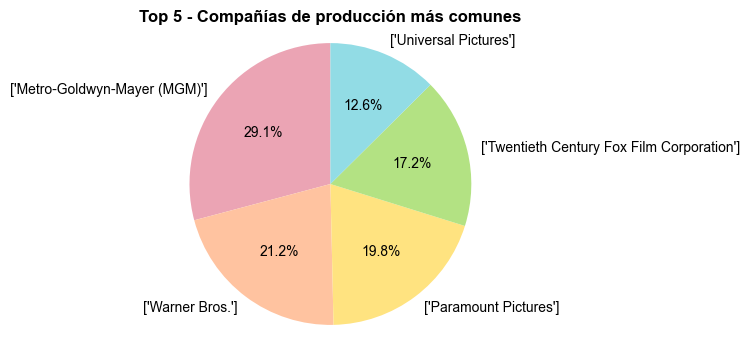

In [17]:
# Calcular el recuento de películas por compañía de producción
production_counts = df["production_companies"].value_counts()

# Obtener el top 5 de compañías de producción más comunes
top_companies = production_counts.head(5)

# Crear el gráfico circular con colores pasteles
plt.figure(figsize=(4, 4))
colors = ["#EBA4B4", "#FFC3A0", "#FFE380", "#B3E283", "#92DCE5"]
plt.pie(top_companies, labels=top_companies.index, colors=colors, autopct='%1.1f%%', startangle=90)

# Personalizar el gráfico
plt.title("Top 5 - Compañías de producción más comunes", fontweight='bold')
plt.axis('equal')

# Mostrar el gráfico
plt.show()

- Ahora voy a crear un gráfico de barras que permita visualizar un top 5 de las películas que generaron un mayor retorno de inversión a lo largo del tiempo 

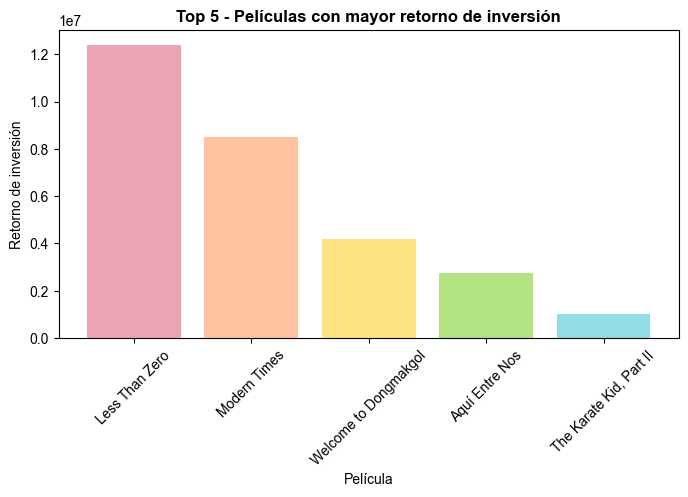

In [18]:
#Obtengo las películas por retorno de inversión en orden descendente
top_movies = df.nlargest(5, "return")

#Creo el gráfico de barras con colores pasteles
plt.figure(figsize=(8, 4))
colors = ["#EBA4B4", "#FFC3A0", "#FFE380", "#B3E283", "#92DCE5"]
plt.bar(top_movies["title"], top_movies["return"], color=colors)

#Personalizo el gráfico
plt.title("Top 5 - Películas con mayor retorno de inversión", fontweight='bold')
plt.xlabel("Película")
plt.ylabel("Retorno de inversión")
plt.xticks(rotation=45)

#Muestro el gráfico
plt.show()

- Luego, voy a realizar un gráfico de barras que permita visualizar el top 5 de las películas que recibieron mayor cantidad de votos

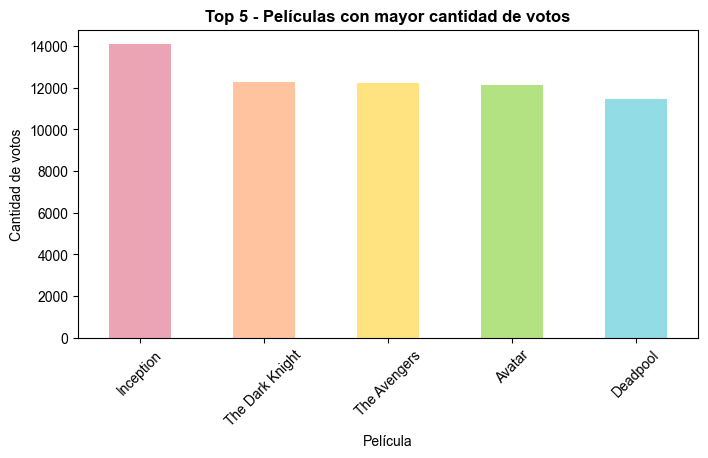

In [19]:
#Ordeno las películas por cantidad de votos en orden descendente
top_movies = df.groupby("title")["vote_count"].sum().nlargest(5)

#Creo el gráfico de barras con colores pastel
plt.figure(figsize=(8, 4))
colors = ["#EBA4B4", "#FFC3A0", "#FFE380", "#B3E283", "#92DCE5"]
top_movies.plot(kind="bar", color=colors)

#Personalizo el gráfico
plt.title("Top 5 - Películas con mayor cantidad de votos", fontweight='bold')
plt.xlabel("Película")
plt.ylabel("Cantidad de votos")
plt.xticks(rotation=45)

#Muestro el gráfico
plt.show()

- Creo un gráfico con el fin de visualizar la relación entre populariodad y retorno de inviersión a partir de la creación de un top 5 

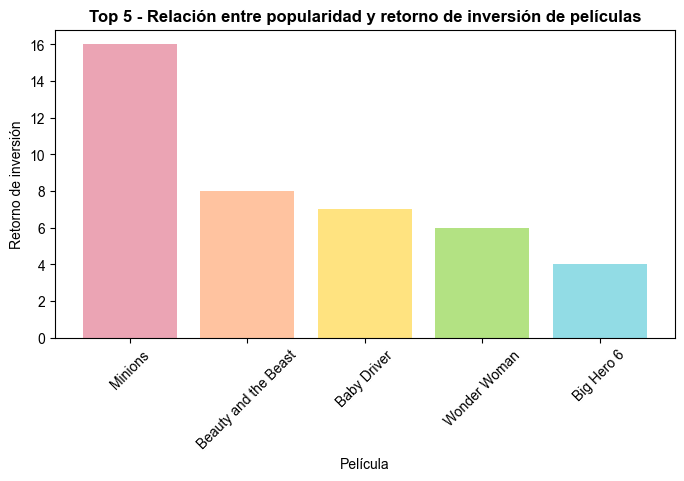

In [20]:
# Obtener el top 5 de películas más populares
top_popular_movies = df.nlargest(5, "popularity")

# Ordenar las películas del top 5 por retorno de inversión en orden descendente
top_movies = top_popular_movies.sort_values("return", ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
colors = ["#EBA4B4", "#FFC3A0", "#FFE380", "#B3E283", "#92DCE5"]
plt.bar(top_movies["title"], top_movies["return"], color=colors)

# Personalizar el gráfico
plt.title("Top 5 - Relación entre popularidad y retorno de inversión de películas", fontweight='bold')
plt.xlabel("Película")
plt.ylabel("Retorno de inversión")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

- Una vez finalizada la creación de los gráficos necesarios según mi perspectiva, voy a proceder a realizar algunos cambios en cuanto a las variables del df

- Veo como quedo mi df

In [21]:
df.head(1)

,belongs_to_collection,genres,original_language,popularity,production_companies,release_date,revenue,status,title,vote_average,vote_count,return,release_year
0,Toy Story Collection,"['Animation', 'Comedy', 'Family']",en,21.946943,['Pixar Animation Studios'],1995-10-30,373554033.0,Released,Toy Story,7.7,5415.0,12.0,1995


- Convierto las variables a numérico

In [22]:
df['belongs_to_collection'] = pd.factorize(df['belongs_to_collection'])[0]
df['genres'] = pd.factorize(df['genres'])[0]
df['original_language'] = pd.factorize(df['original_language'])[0]
df['production_companies'] = pd.factorize(df['production_companies'])[0]
df['status'] = pd.factorize(df['status'])[0]
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')
df['return'] = pd.to_numeric(df['return'], errors='coerce')

- Convierto la columna release_date en un objeto de tipo datetime

In [23]:
df['release_date'] = pd.to_datetime(df['release_date'])
#Extraigo el año de cada fecha, luego realizo una operación de división entera para obtener la década correspondiente a cada fecha. 
df['release_date'] = (df['release_date'].dt.year // 10) * 10

In [24]:
df.head(1)

,belongs_to_collection,genres,original_language,popularity,production_companies,release_date,revenue,status,title,vote_average,vote_count,return,release_year
0,0,0,0,21.946943,0,1990,373554033.0,0,Toy Story,7.7,5415.0,12.0,1995


- Convierto la variable title a categórica

In [25]:
df['title'] = df['title'].astype('category')

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   belongs_to_collection  45376 non-null  int64   
 1   genres                 45376 non-null  int64   
 2   original_language      45376 non-null  int64   
 3   popularity             45376 non-null  float64 
 4   production_companies   45376 non-null  int64   
 5   release_date           45376 non-null  int64   
 6   revenue                45376 non-null  float64 
 7   status                 45376 non-null  int64   
 8   title                  45376 non-null  category
 9   vote_average           45376 non-null  float64 
 10  vote_count             45376 non-null  float64 
 11  return                 45376 non-null  float64 
 12  release_year           45376 non-null  int64   
dtypes: category(1), float64(5), int64(7)
memory usage: 5.7 MB
None


- En este caso, title es la variable objetivo. El resto de las variables son las llamadas predictoras o independientes

- A continuación, creo un diagrama de correlación entre las variables

In [27]:
corr = df.corr()

/var/folders/n3/ppx4r_992xxbdk4s0ht21__m0000gn/T/ipykernel_7081/658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [28]:
corr.style.background_gradient(cmap="coolwarm")

,belongs_to_collection,genres,original_language,popularity,production_companies,release_date,revenue,status,vote_average,vote_count,return,release_year
belongs_to_collection,1.000000,0.123645,0.041317,0.106271,0.055823,0.043095,0.126714,-0.000728,0.031895,0.120637,-0.002341,0.043025
genres,0.123645,1.000000,0.030765,0.048248,0.121346,0.047273,0.040400,0.002946,0.006597,0.038875,0.001251,0.048839
original_language,0.041317,0.030765,1.000000,-0.091976,0.139230,0.093061,-0.056378,0.003152,0.064749,-0.067221,-0.001655,0.093318
popularity,0.106271,0.048248,-0.091976,1.000000,0.040673,0.128717,0.506158,-0.010733,0.153773,0.559925,0.003214,0.131690
production_companies,0.055823,0.121346,0.139230,0.040673,1.000000,0.237671,0.001119,0.027988,0.021937,0.025126,-0.004151,0.242505
release_date,0.043095,0.047273,0.093061,0.128717,0.237671,1.000000,0.087637,0.031784,0.025490,0.106848,-0.005471,0.993472
revenue,0.126714,0.040400,-0.056378,0.506158,0.001119,0.087637,1.000000,-0.011092,0.083799,0.812010,0.000791,0.088355
status,-0.000728,0.002946,0.003152,-0.010733,0.027988,0.031784,-0.011092,1.000000,-0.004078,-0.012439,-0.000574,0.032893
vote_average,0.031895,0.006597,0.064749,0.153773,0.021937,0.025490,0.083799,-0.004078,1.000000,0.123600,0.005589,0.026138
vote_count,0.120637,0.038875,-0.067221,0.559925,0.025126,0.106848,0.812010,-0.012439,0.123600,1.000000,0.003598,0.106789


- Entre popularity y revenue, existe una correlación positiva significativa, haciendo referencia a que las películas más populares tienden a generar mayores ingresos; por lo tanto voy a proceder a eliminar la columna revenue para que estos valores no se repitan

In [29]:
df.drop("revenue",axis="columns",inplace=True)

- Elimino la columna vote_count ya que comparte un valor con la columna pupularity (priorizo resguardar la información que más me puede llegar a aportar valor en la creación tanto de mis funciones, como de mi modelo de ML)

In [30]:
df.drop("vote_count",axis="columns",inplace=True)

In [31]:
corr = df.corr()
corr.style.background_gradient(cmap="coolwarm")

/var/folders/n3/ppx4r_992xxbdk4s0ht21__m0000gn/T/ipykernel_7081/3337538518.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,belongs_to_collection,genres,original_language,popularity,production_companies,release_date,status,vote_average,return,release_year
belongs_to_collection,1.000000,0.123645,0.041317,0.106271,0.055823,0.043095,-0.000728,0.031895,-0.002341,0.043025
genres,0.123645,1.000000,0.030765,0.048248,0.121346,0.047273,0.002946,0.006597,0.001251,0.048839
original_language,0.041317,0.030765,1.000000,-0.091976,0.139230,0.093061,0.003152,0.064749,-0.001655,0.093318
popularity,0.106271,0.048248,-0.091976,1.000000,0.040673,0.128717,-0.010733,0.153773,0.003214,0.131690
production_companies,0.055823,0.121346,0.139230,0.040673,1.000000,0.237671,0.027988,0.021937,-0.004151,0.242505
release_date,0.043095,0.047273,0.093061,0.128717,0.237671,1.000000,0.031784,0.025490,-0.005471,0.993472
status,-0.000728,0.002946,0.003152,-0.010733,0.027988,0.031784,1.000000,-0.004078,-0.000574,0.032893
vote_average,0.031895,0.006597,0.064749,0.153773,0.021937,0.025490,-0.004078,1.000000,0.005589,0.026138
return,-0.002341,0.001251,-0.001655,0.003214,-0.004151,-0.005471,-0.000574,0.005589,1.000000,-0.005017
release_year,0.043025,0.048839,0.093318,0.131690,0.242505,0.993472,0.032893,0.026138,-0.005017,1.000000


### Como paso siguiente, voy a crear un nuevo df que contenga mi EDA realizado ###

In [32]:
df.to_csv("/Users/romina/Desktop/Datasets/peliculas_ml.csv",index=False)